<a href="https://colab.research.google.com/github/datascience-vivek/EDA-Capstone-Project-on-Hotel-Bookings/blob/main/EDA_Capstone_Project_on_Hotel_Bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Reading and understanding data:**

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Define the path where data is kept:
path = '/content/drive/My Drive/Datasets/'

In [4]:
#Reading the data:
df = pd.read_csv(path + 'Hotel_Bookings.csv')

In [5]:
#Inspect datatypes and null values in the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## **List of Column Names:**

In [6]:
#List of Columns:
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

## **Find Empty Cells in Dataset:**

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## **Missing values in Company and Agent Column in this Dataset:**


*   Comapany and Agent column has much missing values, so fill them with zero in dataset to make no issue.



In [8]:
df[['agent','company','country']] = df[['agent','company','country']].fillna(0)

In [9]:
df.shape

(119390, 32)

# **First Five rows of the Dataset.:**





In [10]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [11]:
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [12]:
#Statistical measure of numerical columns
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## **Merging Both Children and Babies columns in Child Column:**

In [13]:
df['child'] = df.children + df.babies

In [14]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,child
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.0


## **Merging Childs Column in Adults Column to Complete Family Member Data:**

In [15]:
df['Family Member'] = df.child + df.adults

In [16]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,child,Family Member
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.0,2.0


In [17]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

([<matplotlib.patches.Wedge at 0x7f997c672dd0>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(1.0433630545977801, 0.592784561455838, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.6086284485153717, 0.3457909941825721, '33.6%')])

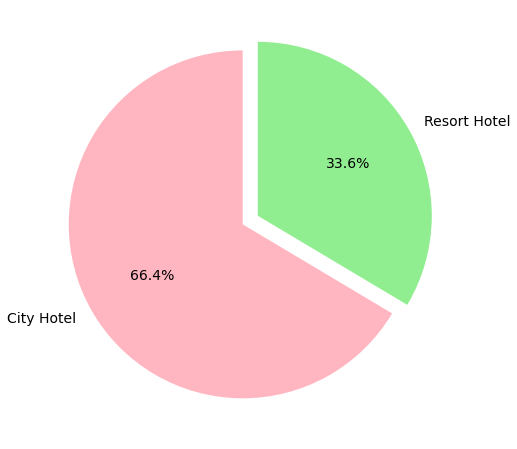

In [18]:
plt.rcParams['figure.figsize'] = 8,8
labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()
explode = (0, 0.1)
colors = ['lightpink','lightgreen']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

### As show in the above bar plot. Maximum Bookings are in the City Hotel as compared to Resort hotel.

# **Mean value for Family Members:**

In [19]:
df['Family Member'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79326.0,1.947268,0.636652,0.0,2.0,2.0,2.0,12.0
Resort Hotel,40060.0,2.009735,0.866054,0.0,2.0,2.0,2.0,55.0


# **Mean value for child:**

In [20]:
df['child'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79326.0,0.096311,0.383560,0.0,0.0,0.0,0.0,10.0
Resort Hotel,40060.0,0.142586,0.463166,0.0,0.0,0.0,0.0,10.0


## **Overview of Cancelled Bookings:**

In [21]:
df['is_canceled'].value_counts().keys()

Int64Index([0, 1], dtype='int64')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Cancelled Bookings')]

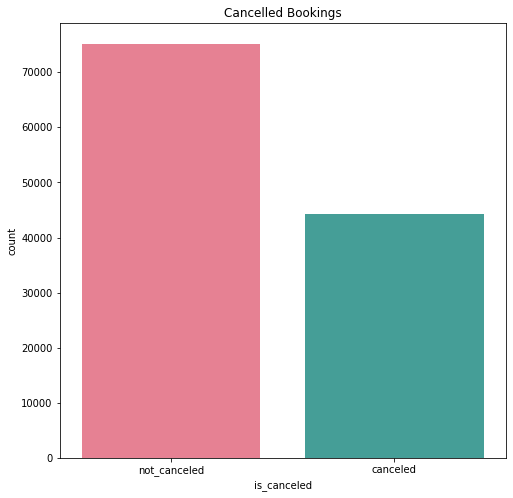

In [22]:
df['is_canceled'] = df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_df = df['is_canceled']
sns.countplot(canceled_df,palette='husl').set(title='Cancelled Bookings')


### As shown in above Majority of the bookings are not cancelled.

## Now, We check which hotel have maximum cancellation bookings:

Text(0.5, 1.0, 'Cancellation Rate in City and Resort hotel')

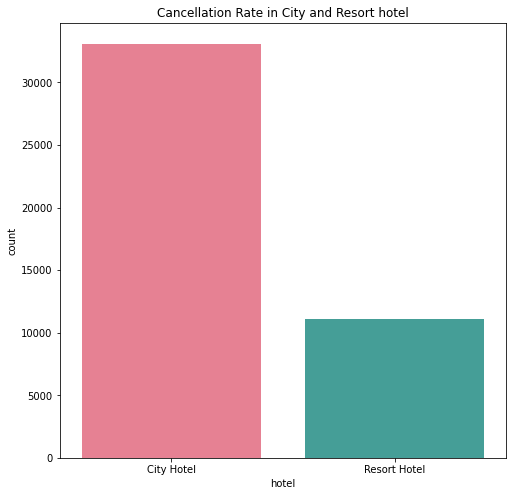

In [23]:
list1 = ['is_canceled', 'hotel']
type_of_hotel_canceled = df[list1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name = 'count')
sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count',palette='husl').set_title('Cancellation Rate in City and Resort hotel')

### Bar Plot shows us City Hotel have much less canceled bookings as compared to Resort Hotel.

## **Now we find which year got Maximum bookings in both hotels:**

In [24]:
df['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

Text(0.5, 1.0, 'Arrival Date Years vs Hotel')

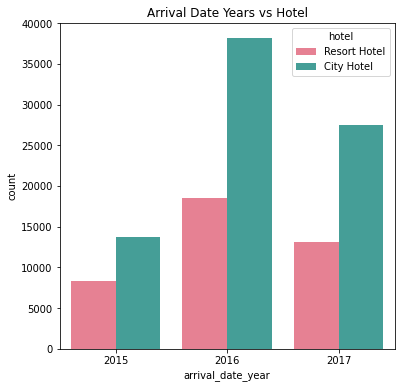

In [25]:
plt.figure(figsize =(6,6))
list2 = ['hotel', 'arrival_date_year']
period_arrival = df[list2]
sns.countplot(data = period_arrival, x = 'arrival_date_year',hue = 'hotel',palette='husl').set_title('Arrival Date Years vs Hotel')

In above, shows session 2016 got maximum bookings in City Hotels.

## **Convert Arrival Date to Datetime:**

In [26]:
df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')
df['is_canceled'] = df['is_canceled'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')

In [27]:
df['arrival_date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')

In [28]:
import datetime as dt

confirmed_bookings = df[df.is_canceled =='0']

confirmed_bookings['arrival_date_month'] = df['arrival_date'].dt.month
final=confirmed_bookings['arrival_date_month'].value_counts().sort_index()
final

1      5929
2      8068
3      9794
4     11089
5     11791
6     10939
7     12661
8     13877
9     10508
10    11160
11     6794
12     6780
Name: arrival_date_month, dtype: int64

## **Now  we check the Arrival Persons Date by Months:**




In [29]:
df.groupby(['hotel', 'arrival_date_month']).size().unstack(fill_value=0)

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
hotel,,,,,,,,,,,,
City Hotel,7480,8983,4132,4965,3736,8088,7894,6458,8232,4357,7605,7400
Resort Hotel,3609,4894,2648,3103,2193,4573,3045,3336,3559,2437,3555,3108


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


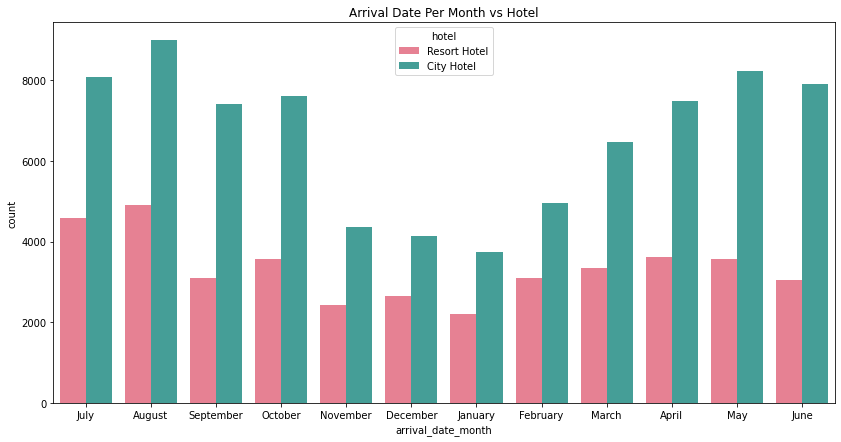

In [30]:
plt.figure(figsize=(14,7))

sns.countplot( df['arrival_date_month'],hue= "hotel", palette='husl', data = df).set_title('Arrival Date Per Month vs Hotel')
plt.show()

## Above Graph shows us that maximum persons came on April-October Months and Lower Bookings in the month of November-January.

# **Now we check majority of the stay on weekend or week nights:**

 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of stays on week nights')

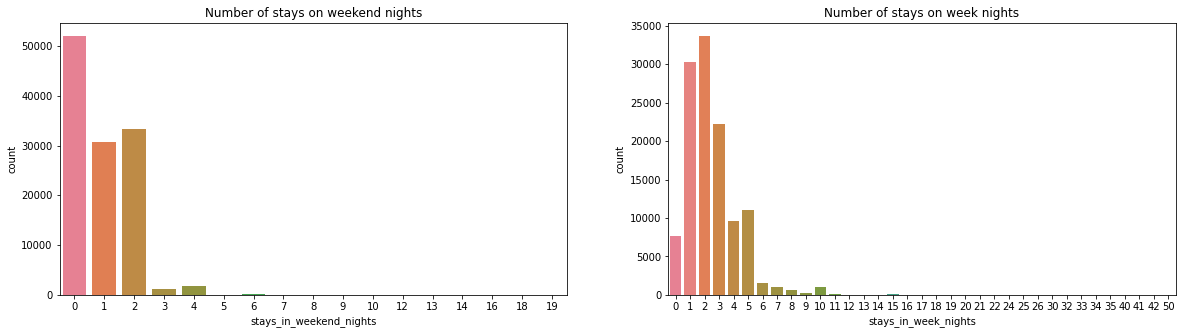

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot('stays_in_weekend_nights', palette='husl',data = df).set_title('Number of stays on weekend nights')
plt.subplot(1,2,2)
sns.countplot('stays_in_week_nights', palette='husl', data = df).set_title('Number of stays on week nights')

### In above graphs, We check majority of the stays are over the weekend nights.

# **Q1- When the best time of Year to book a Hotel Room is...?**



In [32]:
df['adr_per_person'] = df['adr']/df['Family Member'] 


In [33]:
df= df.dropna(axis=0)

In [34]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [35]:
df['is_canceled'].replace(('not_canceled', 'canceled'), (1, 0), inplace=True)

In [36]:
df['is_canceled'].value_counts()


1    75042
0    44195
Name: is_canceled, dtype: int64

# **Correlation Matrics**

In [37]:
df_subset = df.copy()

In [38]:
df_subset = df_subset.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                            'arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date',
                            'previous_cancellations','previous_bookings_not_canceled'],axis=1)

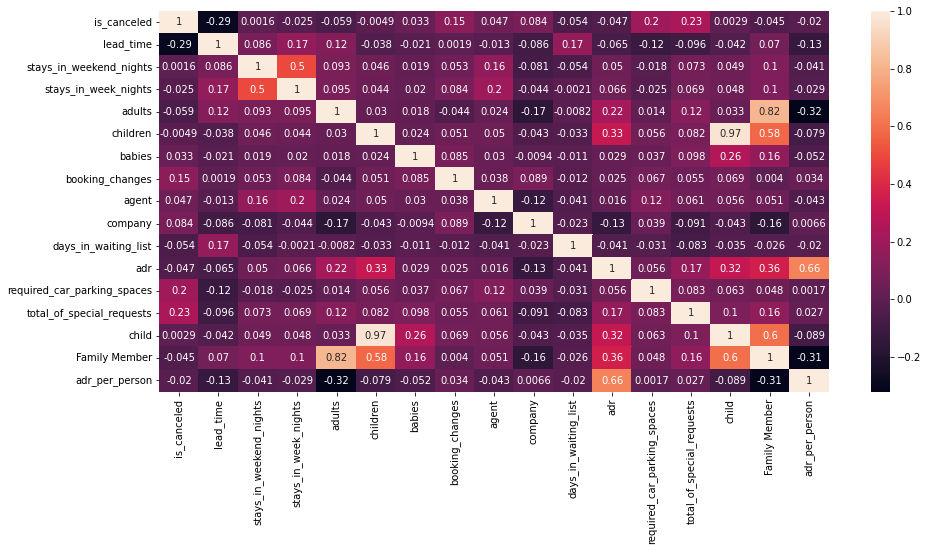

In [39]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df_subset.corr(), annot=True, ax=ax);

As we see, adr and adr per person is highly correlated and family member to child and adults.

# **Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Average Daily Rate Per Person Over The Year in Different Hotels')

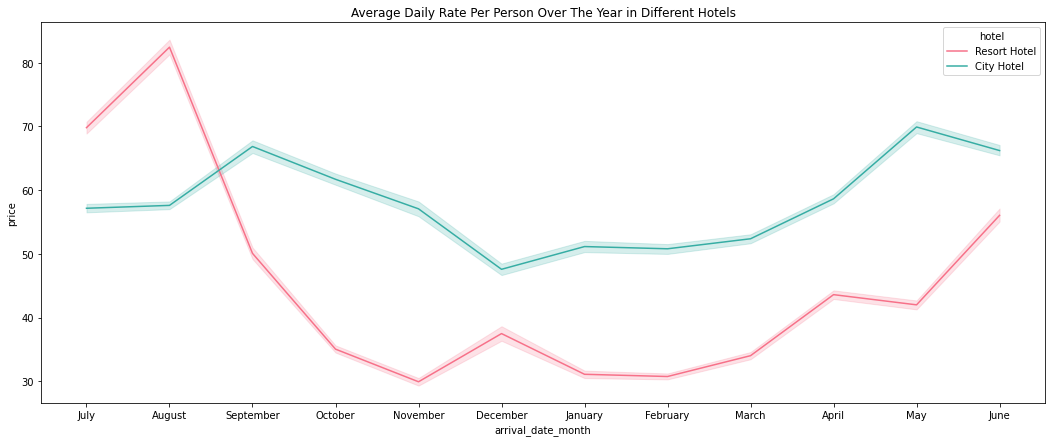

In [40]:
plt.figure(figsize=(18,7))
actual_guests= df[df['is_canceled'] == 1]
actual_guests['price'] = actual_guests['adr_per_person']
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel', palette= 'husl').set_title('Average Daily Rate Per Person Over The Year in Different Hotels')

## So, Above Graph Shows us November- January, there average daily rate will be less.

# **Q2. When hotels was likely to recieve high number of special request...?**








In [41]:
df['total_of_special_requests'].value_counts()

0    70217
1    33187
2    12959
3     2494
4      340
5       40
Name: total_of_special_requests, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


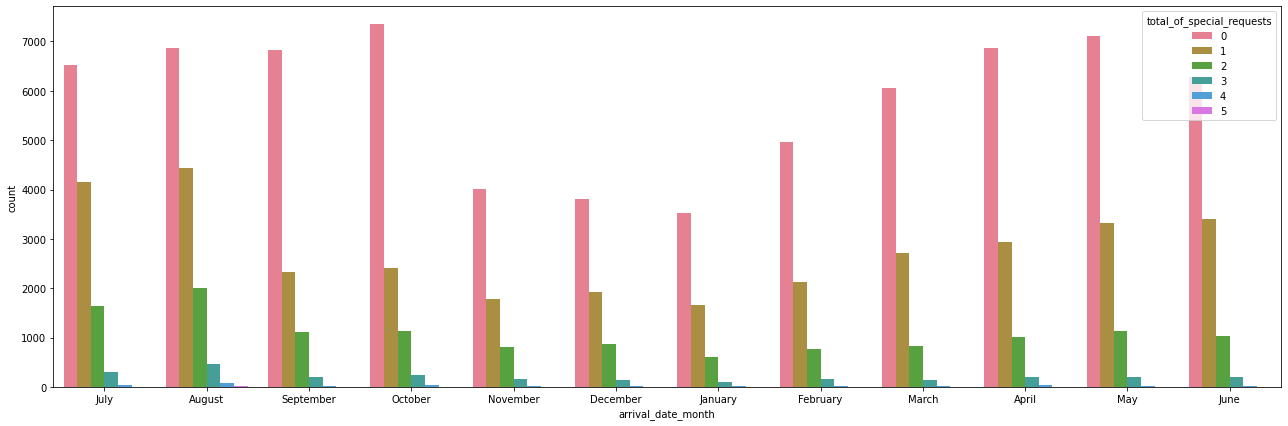

In [42]:
plt.figure(figsize=(22,7))

sns.countplot( df['arrival_date_month'],hue= ("total_of_special_requests"), palette= 'husl', data = df).set_title('')

plt.show()


## In above graph shows maximum number of requests comes on June to August period.

# **Summary:**


*   In this dataset, We see maximum number of bookings were done on City Resort as compared to Resort Hotels.
*   Here, We see Maximum Number of special requests were made on June-October Months.


*  We see Maximum Number of bookings were made on April-October Months.


*   Another thing, We see here maximum number of people stays on week nights.

*   Average Daily Rate Person, are cheap in resort hotel as compared to city hotels in the month of November to January.





